# Hall effect

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.constants import physical_constants as cte
from scipy.optimize import curve_fit
from scipy import stats
import pandas as pd
%matplotlib inline

In [2]:
path_figs = './Figs/'
save_figs = False
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 14}

matplotlib.rc('font', **font)
def save_fig(fig, name):
    fig.savefig(path_figs + name + '.png', dpi=300)
    fig.savefig(path_figs + name + '.eps', dpi=300)

## Calibration magnetic field

Calibration of magnetic sensor is: 0.1172 T/mV at 10 mA

In [3]:
I1 = np.arange(0,16)
V1 = np.array([0.060,0.405,0.743,1.098,1.437,1.775,2.100,2.432,2.766,3.080,3.419,3.739,4.051,4.374,4.682,4.977])
c = 0.1172
B = V1[13] * c

In [4]:
err_B = np.abs(V1) * 5e-5 + np.abs(c) * 5e-4

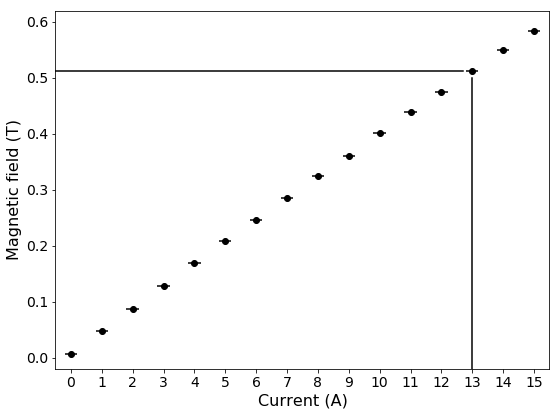

In [5]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
ax.errorbar(I1, c*V1, yerr=err_B, xerr=.2, fmt='ko')
ax.plot([-1,12.7], [B, B], 'k-')
ax.plot([13,13], [-1, .5], 'k-')
ax.set_xlabel('Current (A)', fontsize=16)
ax.set_ylabel('Magnetic field (T)', fontsize=16)
ax.set_xticks(np.arange(0, 16, step=1))
ax.set_xbound(-.5,15.5)
ax.set_ybound(-.02,.62)
plt.tight_layout()
if save_figs:
    save_fig(fig, 'Magnetic_field_vs_current')

In [6]:
print(B)

0.5126328


## Check Ohmic behaviour

In [7]:
I2 = np.arange(10,160,10)
V2 = np.array([40.7,81.1,122.2,162.7,202.9,243.2,283.6,324.7,365.1,405.3,445.5,485.8,527.0,567.3,607.5])
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(I2, V2)
print(slope2)
print(intercept2)
print(r_value2)
print(p_value2)
print(std_err2)

4.048107142857143
0.4580952380952681
0.99999885689099
4.6869276251004674e-38
0.001697616221964907


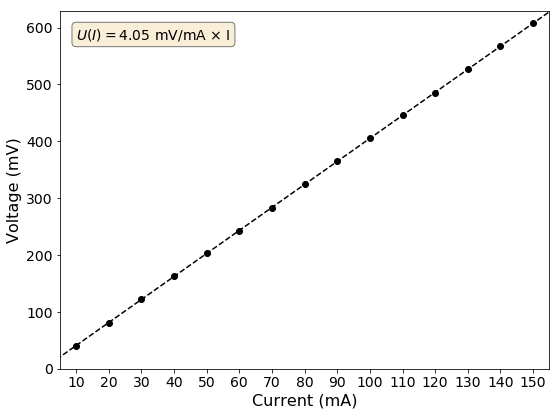

In [8]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
ax.errorbar(I2, V2, yerr=.5, xerr=.05, fmt='ko')
x2 = np.linspace(0,160)
y2 = x2 * slope2 + intercept2
ax.plot(x2, y2, 'k--')
ax.set_xlabel('Current (mA)', fontsize=16)
ax.set_ylabel('Voltage (mV)', fontsize=16)
ax.set_xbound(5,155)
ax.set_ybound(0,630)
ax.set_xticks(np.arange(10,160,10))
ax.text(10,580, r"$U(I)={:.2f}$ mV/mA $\times$ I".format(slope2), fontsize=14, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.tight_layout()
if save_figs:
    save_fig(fig, 'Voltage_vs_current_ohmic_test')

## Orientation of the sample

In [9]:
angle = np.arange(-90,100,10)
V = np.array([-9.22,-9.01,-8.82,-8.63,-8.45,-8.3,-8.17,-8.07,-8.01,-7.98,-7.98,-8.02,-8.10,-8.21,-8.35,-8.52,-8.7,-8.89,-9.09])

In [10]:
def fit_fun(angle, u0, u_offset, phi):
    return u0 * np.cos(angle + phi) + u_offset

In [11]:
popt, pcov = curve_fit(fit_fun, np.deg2rad(angle), V)

In [12]:
print(popt)
print(pcov)

[ 1.18225737 -9.15857643 -0.05483522]
[[ 1.03952611e-05 -6.25900777e-06  3.79884981e-07]
 [-6.25900777e-06  4.93574913e-06 -2.90595913e-07]
 [ 3.79884981e-07 -2.90595913e-07  1.60096857e-06]]


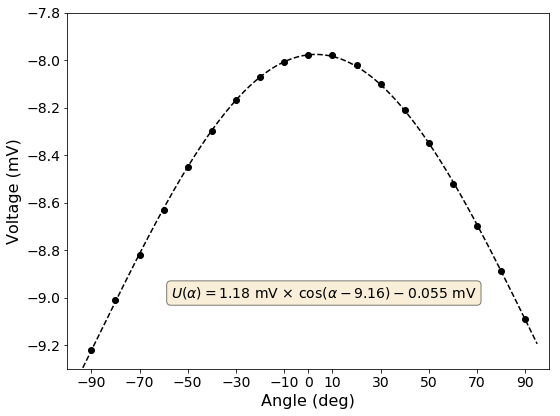

In [13]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
ax.errorbar(angle, V, yerr=5e-3, xerr=5e-1, fmt='ko')
x = np.deg2rad(np.arange(-95,95,.1))
y = fit_fun(x, *popt)
ax.plot(np.rad2deg(x), y, 'k--')
#ax.plot([5,5], [-12,-7.97], 'k-')
ax.set_xlabel('Angle (deg)', fontsize=16)
ax.set_ylabel('Voltage (mV)', fontsize=16)
ax.set_xbound(-100,100)
ax.set_ybound(-9.3,-7.8)
ax.set_xticks([-90,-70,-50,-30,-10,0,10,30,50,70,90])
ax.text(-57,-9, r"$U(\alpha)={:.2f}$ mV $\times$ $\cos(\alpha {:.2f}) {:.3f}$ mV".format(*popt),
        fontsize=14, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.tight_layout()
if save_figs:
    save_fig(fig, 'Voltage_vs_angle')

## Dataset preparation

In [14]:
data1 = np.loadtxt('measurements.txt', comments='#')
T1 = data1[:, 0]
U_t1 = data1[:, 2]
U_off1 = data1[:, 1]
U_Hall1 = U_t1 - U_off1
U_op1 = data1[:, 3]
U_pm1 = data1[:, 4]
R_mn_op1 = np.abs(U_op1 / .1)
R_no_pm1 = np.abs(U_pm1 / .1)

In [15]:
err_R_mn_op1 = 1/.1 * 5e-3 + np.abs(U_op1) / .1**2 * 5e-4
err_R_no_pm1 = 1/.1 * 5e-3 + np.abs(U_pm1) / .1**2 * 5e-4

Data from other group

In [16]:
data2 = pd.read_excel('Data_Lettner_Schuele.xlsx', header=None,
                       names=['Temperature', 'Hall_Total_Voltage', 'Hall_Offset_Voltage', 'Voltage_OP', 'Voltage_PM'],
                       usecols='B:F', dtype=np.float64, skiprows=6)

In [17]:
data2.head()

Temperature  Hall_Total_Voltage  Hall_Offset_Voltage  Voltage_OP  \
0         82.2                65.5                 86.9      -159.6   
1         87.3                48.8                 56.2      -107.0   
2         96.0                36.0                 42.0       -84.0   
3        102.4                29.7                 34.7       -67.0   
4        109.0                25.1                 29.4       -58.0   

   Voltage_PM  
0      -245.2  
1      -163.0  
2      -127.0  
3      -102.0  
4       -87.0

Plots of both our data and other group's data

In [18]:
T2 = data2['Temperature'].values
U_t2 = -data2['Hall_Total_Voltage'].values
U_off2 = -data2['Hall_Offset_Voltage'].values
U_Hall2 = U_t2 - U_off2
U_op2 = data2['Voltage_OP'].values
U_pm2 = data2['Voltage_PM'].values
# Fix missing sign in their data
U_pm2[26] *= -1
R_mn_op2 = np.abs(U_op2 / .1)
R_no_pm2 = np.abs(U_pm2 / .1)

In [19]:
err_R_mn_op2 = 1/.1 * 5e-3 + np.abs(U_op2) / .1**2 * 5e-4
err_R_no_pm2 = 1/.1 * 5e-3 + np.abs(U_pm2) / .1**2 * 5e-4

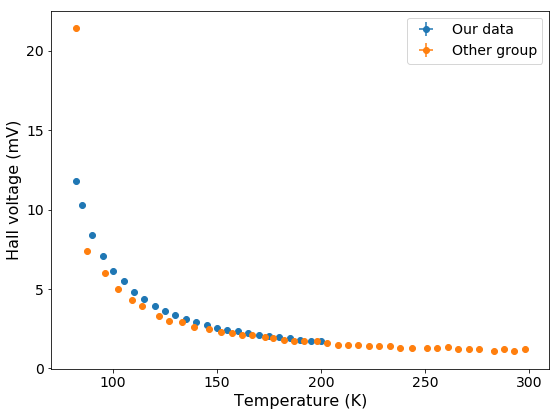

In [20]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
ax.errorbar(T1, U_Hall1, yerr=.1, xerr=1, fmt='o', label='Our data')
ax.errorbar(T2, U_Hall2, yerr=.1, xerr=1, fmt='o', label='Other group')
ax.set_xlabel('Temperature (K)', fontsize=16)
ax.set_ylabel('Hall voltage (mV)', fontsize=16)
ax.legend(loc=0, fontsize=14)
plt.tight_layout()
if save_figs:
    save_fig(fig, 'Hall_voltage_vs_Temperature_both_datasets')

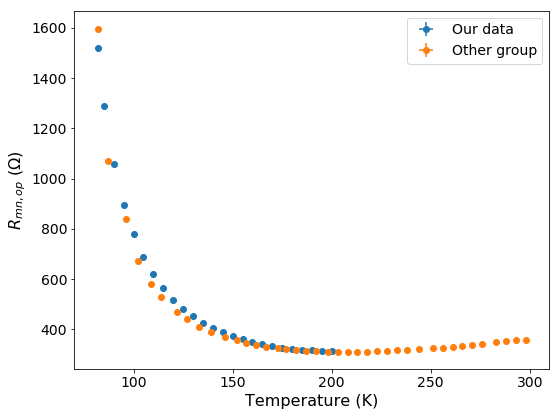

In [21]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
ax.errorbar(T1, R_mn_op1, yerr=err_R_mn_op1, xerr=1, fmt='o', label='Our data')
ax.errorbar(T2, R_mn_op2, yerr=err_R_mn_op2, xerr=1, fmt='o', label='Other group')
ax.legend(loc=0, fontsize=14)
ax.set_xlabel('Temperature (K)', fontsize=16)
ax.set_ylabel('$R_{mn,op}$ ($\Omega$)', fontsize=16)
plt.tight_layout()
if save_figs:
    save_fig(fig, 'R_mn_op_vs_Temperature_both_datasets')

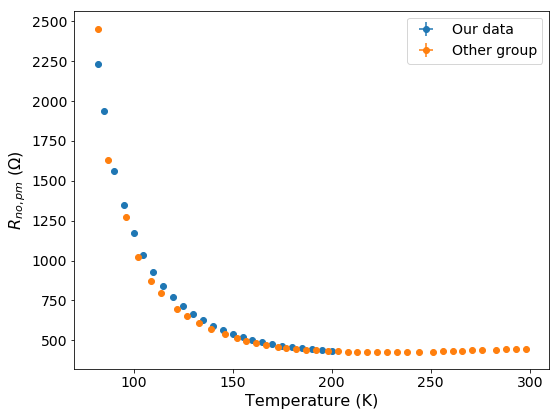

In [22]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
ax.errorbar(T1, R_no_pm1, yerr=err_R_no_pm1, xerr=1, fmt='o', label='Our data')
ax.errorbar(T2, R_no_pm2, yerr=err_R_no_pm2, xerr=1, fmt='o', label='Other group')
ax.legend(loc=0, fontsize=14)
ax.set_xlabel('Temperature (K)', fontsize=16)
ax.set_ylabel('$R_{no,pm}$ ($\Omega$)', fontsize=16)
plt.tight_layout()
if save_figs:
    save_fig(fig, 'R_no_pm_vs_Temperature_both_datasets')

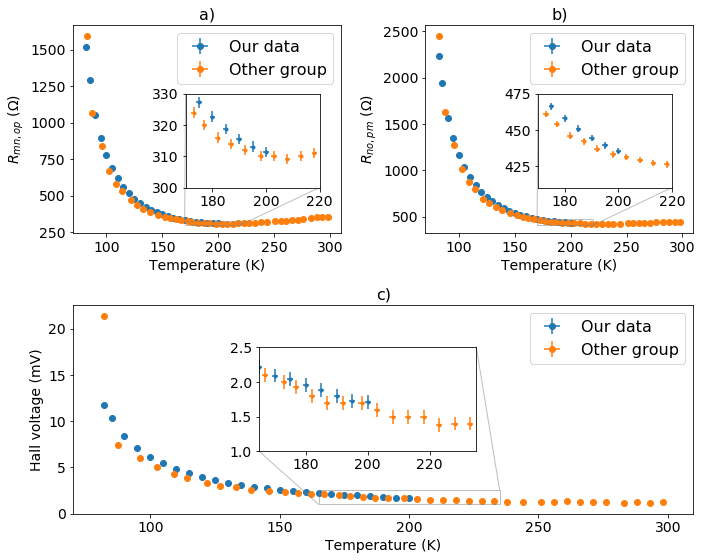

In [23]:
gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(gs[0, 0])
ax1.set_title('a)', fontsize=16)
ax1.errorbar(T1, R_mn_op1, yerr=err_R_mn_op1, xerr=1, fmt='o', label='Our data')
ax1.errorbar(T2, R_mn_op2, yerr=err_R_mn_op2, xerr=1, fmt='o', label='Other group')
ax1.legend(loc=0, fontsize=16)
ax1.set_xlabel('Temperature (K)', fontsize=14)
ax1.set_ylabel('$R_{mn,op}$ ($\Omega$)', fontsize=14)
# Zoom area
axins = ax1.inset_axes([.42, .22, .5, .45], )
axins.errorbar(T1, R_mn_op1, yerr=err_R_mn_op1, xerr=1, fmt='.')
axins.errorbar(T2, R_mn_op2, yerr=err_R_mn_op2, xerr=1, fmt='.')
axins.set_xlim(170, 220)
axins.set_ylim(300, 330)
ax1.indicate_inset_zoom(axins)

ax2 = fig.add_subplot(gs[0, 1])
ax2.set_title('b)', fontsize=16)
ax2.errorbar(T1, R_no_pm1, yerr=err_R_no_pm1, xerr=1, fmt='o', label='Our data')
ax2.errorbar(T2, R_no_pm2, yerr=err_R_no_pm2, xerr=1, fmt='o', label='Other group')
ax2.legend(loc=0, fontsize=16)
ax2.set_xlabel('Temperature (K)', fontsize=14)
ax2.set_ylabel('$R_{no,pm}$ ($\Omega$)', fontsize=14)
# Zoom area
axins = ax2.inset_axes([.42, .22, .5, .45], )
axins.errorbar(T1, R_no_pm1, yerr=err_R_no_pm1, xerr=1, fmt='.')
axins.errorbar(T2, R_no_pm2, yerr=err_R_no_pm2, xerr=1, fmt='.')
axins.set_xlim(170, 220)
axins.set_ylim(410, 475)
ax2.indicate_inset_zoom(axins)

ax3 = fig.add_subplot(gs[1, :])
ax3.set_title('c)', fontsize=16)
ax3.errorbar(T1, U_Hall1, yerr=.1, xerr=1, fmt='o', label='Our data')
ax3.errorbar(T2, U_Hall2, yerr=.1, xerr=1, fmt='o', label='Other group')
ax3.set_xlabel('Temperature (K)', fontsize=14)
ax3.set_ylabel('Hall voltage (mV)', fontsize=14)
ax3.legend(loc=0, fontsize=16)
# Zoom area
axins = ax3.inset_axes([.3, .3, .35, .5], )
axins.errorbar(T1, U_Hall1, yerr=.1, xerr=1, fmt='.')
axins.errorbar(T2, U_Hall2, yerr=.1, xerr=1, fmt='.')
axins.set_xlim(165, 235)
axins.set_ylim(1, 2.5)
ax3.indicate_inset_zoom(axins)

plt.tight_layout()

if save_figs:
    save_fig(fig, 'comparison_datasets')

Combined data from our measurements and the other group

In [24]:
cut = 21

In [25]:
T3 = np.concatenate((T1, T2[cut:]))
U_t3 = np.concatenate((U_t1, U_t2[cut:]))
U_off3 = np.concatenate((U_off1, U_off2[cut:]))
U_Hall3 = U_t3 - U_off3
U_op3 = np.concatenate((U_op1, U_op2[cut:]))
U_pm3 = np.concatenate((U_pm1, U_pm2[cut:]))
R_mn_op3 = np.abs(U_op3 / .1)
R_no_pm3 = np.abs(U_pm3 / .1)
err_R_mn_op2 = 1/.1 * 5e-3 + np.abs(U_op3) / .1**2 * 5e-4
err_R_no_pm2 = 1/.1 * 5e-3 + np.abs(U_pm3) / .1**2 * 5e-4

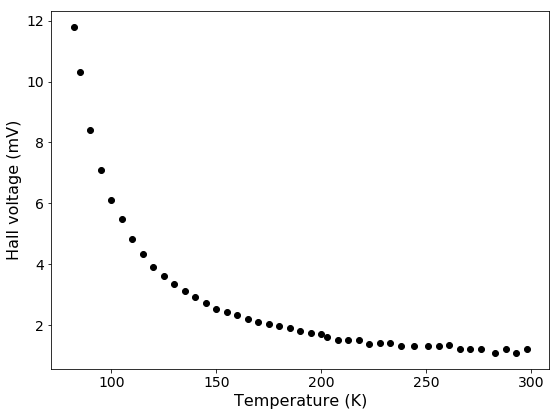

In [26]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
ax.plot(T3, U_Hall3, 'ko')
ax.set_xlabel('Temperature (K)', fontsize=16)
ax.set_ylabel('Hall voltage (mV)', fontsize=16)
plt.tight_layout()

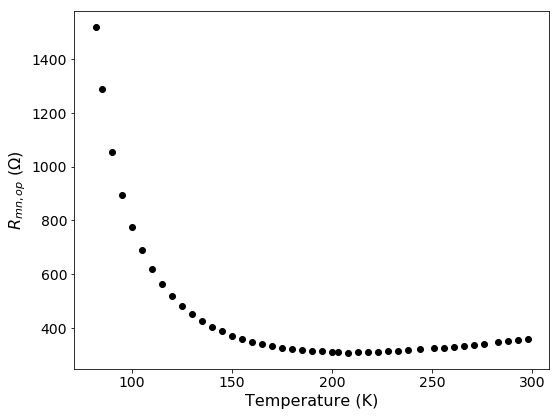

In [27]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
ax.plot(T3, R_mn_op3, 'ko')
ax.set_xlabel('Temperature (K)', fontsize=16)
ax.set_ylabel('$R_{mn,op}$ ($\Omega$)', fontsize=16)
plt.tight_layout()

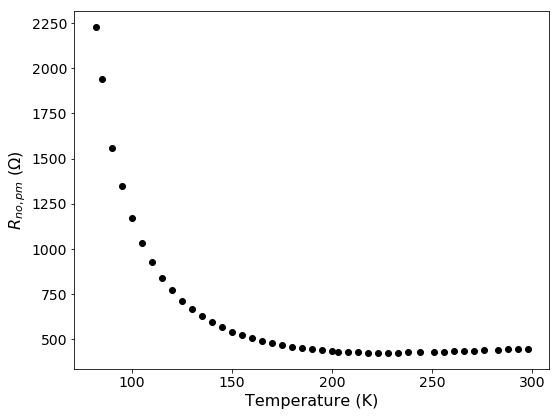

In [28]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
ax.plot(T3, R_no_pm3, 'ko')
ax.set_xlabel('Temperature (K)', fontsize=16)
ax.set_ylabel('$R_{no,pm}$ ($\Omega$)', fontsize=16)
plt.tight_layout()

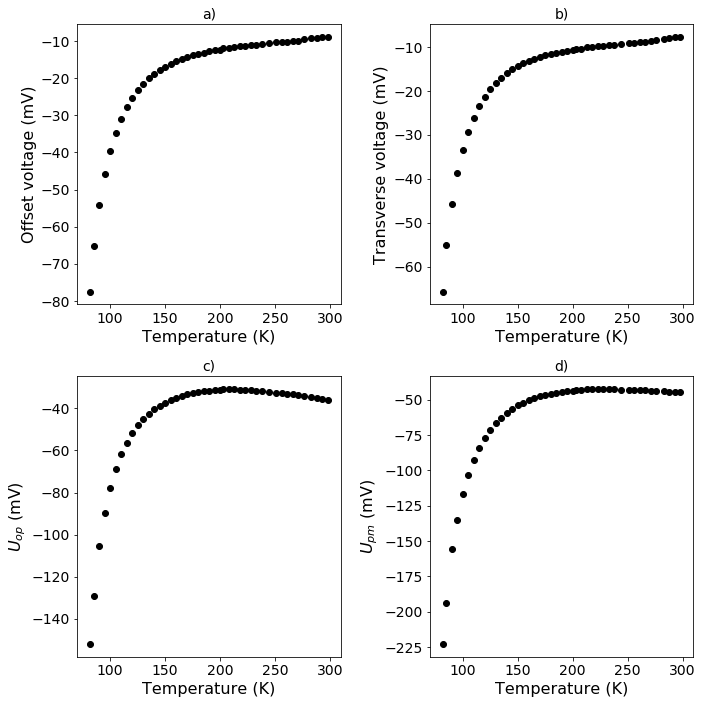

In [29]:
gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(gs[0, 0])
ax1.set_title('a)', fontsize=14)
ax1.errorbar(T3, U_off3, yerr=5e-3, xerr=1, fmt='ko')
ax1.set_xlabel('Temperature (K)', fontsize=16)
ax1.set_ylabel('Offset voltage (mV)', fontsize=16)

ax2 = fig.add_subplot(gs[0, 1])
ax2.set_title('b)', fontsize=14)
ax2.errorbar(T3, U_t3, yerr=5e-3, xerr=1, fmt='ko')
ax2.set_xlabel('Temperature (K)', fontsize=16)
ax2.set_ylabel('Transverse voltage (mV)', fontsize=16)

ax3 = fig.add_subplot(gs[1, 0])
ax3.set_title('c)', fontsize=14)
ax3.errorbar(T3, U_op3, yerr=1e-3, xerr=1, fmt='ko')
ax3.set_xlabel('Temperature (K)', fontsize=16)
ax3.set_ylabel(r'$U_{op}$ (mV)', fontsize=16)

ax4 = fig.add_subplot(gs[1, 1])
ax4.set_title('d)', fontsize=14)
ax4.errorbar(T3, U_pm3, yerr=1e-3, xerr=1, fmt='ko')
ax4.set_xlabel('Temperature (K)', fontsize=16)
ax4.set_ylabel(r'$U_{pm}$ (mV)', fontsize=16)

plt.tight_layout()

if save_figs:
    save_fig(fig, 'final_dataset')

In [30]:
data3 = pd.DataFrame(data={'Temperature':T3, 'Hall_Voltage':U_Hall3, 'R_mn_op':R_mn_op3, 'R_no_pm':R_no_pm3})

In [31]:
data3.head()

Temperature  Hall_Voltage  R_mn_op  R_no_pm
0         82.0          11.8   1520.0   2230.0
1         85.0          10.3   1290.0   1940.0
2         90.0           8.4   1056.0   1560.0
3         95.0           7.1    895.1   1350.0
4        100.0           6.1    777.5   1171.0

In [32]:
#data3.to_csv('Combined_dataset.csv')
#data3.to_excel('Combined_dataset.xlsx')

## Determination of $p$ and $\mu$

In [33]:
#def p_doping(x, Na, Ea):
#    return 2 * Na / (1 + np.sqrt(1 + 16 * Na / Nv(x) * np.exp(Ea * x / (1000 * cte.Boltzmann))))

#def p_doping_low_T(T, Na, Ea):
#    return .5 * np.sqrt(Na * Nv(T)) * np.exp(Ea / (2 * cte.Boltzmann * T))

#def Nv(x):
#    return 2 * (2 * np.pi * m_dh * cte.Boltzmann * 1000 / (cte.Planck**2 * x))**(3/2)

In [233]:
def Nv(T):
    # x = 1000 / T
    kB = cte['Boltzmann constant'][0]
    m0 = cte['electron mass'][0]
    h = cte['Planck constant'][0]
    mdh = 0.689 * m0
    return 2 * np.power((2 * np.pi * mdh * kB * T / h**2), 3/2)

In [244]:
def p_full(T, Na, Ea):
    # x = 1000 / T
    kB = cte['Boltzmann constant'][0]
    return 2 * Na / (1 + np.sqrt(1 + 16 * Na / Nv(T) * np.exp(Ea / (kB * T))))

In [245]:
def p_approx(x, Na, Ea):
    kB = cte['Boltzmann constant'][0]
    return .5 * np.sqrt(Na * Nv(x)) * np.exp(-Ea * x / (2000 * kB))

In [246]:
d = 3.1e-3 # cm
I0 = 0.1e-3 # A

In [247]:
R_H3 = U_Hall3 * d / (B * I0 * 10)
R_H2 = U_Hall2 * d / (B * I0 * 10)
R_H1 = U_Hall1 * d / (B * I0 * 10)

In [248]:
electron_charge = cte['elementary charge'][0]
p3 = 1 / (electron_charge * R_H3)
p2 = 1 / (electron_charge * R_H2)
p1 = 1 / (electron_charge * R_H1)

40mV for Ea
10^18 for Na

In [249]:
eV = cte['electron volt'][0]
40e-3 * eV

6.4087064832e-21

In [258]:
T3[:-10]

array([ 82.,  85.,  90.,  95., 100., 105., 110., 115., 120., 125., 130.,
       135., 140., 145., 150., 155., 160., 165., 170., 175., 180., 185.,
       190., 195., 200., 203., 208., 213., 218., 223., 228., 233., 238.,
       244.])

In [261]:
popt1, pcov1 = curve_fit(p_full, T3[:-10], p3[:-10], p0=(1e18, 4e-20))
print(popt1)
print(pcov1)
perr1 = np.sqrt(np.diag(pcov1))
print(perr1)

[6.35539786e+17 2.77835886e-20]
[[6.73640634e+32 7.35043185e-06]
 [7.35043185e-06 5.71134060e-43]]
[2.59545879e+16 7.55734120e-22]


In [262]:
popt1

array([6.35539786e+17, 2.77835886e-20])

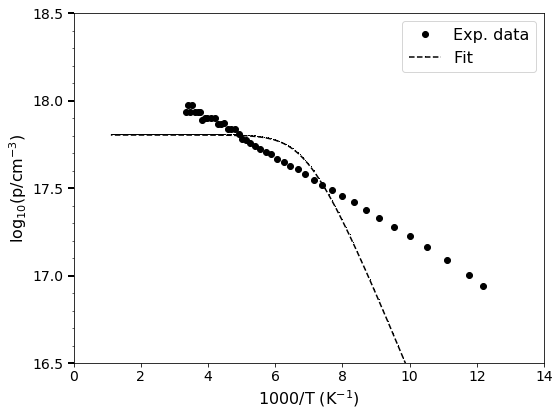

In [267]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
ax.plot(1000/T3, np.log10(p3), 'ko', label='Exp. data')
T = np.linspace(72, 900, 500)
ax.plot(1000/T, np.log10(p_full(T, *popt1)), 'k--,', label='Fit')
#ax.plot(1000/T, np.log10(p_full(1000/T, *popt1)), 'b--', label='Fit2')
#ax.plot(1000/T, np.log10(p_full(1000/T, 2.00095673e+18, 1.5e-23)), 'k--', label='Fit')
#ax.plot(1000/T, np.log10(p_approx(1000/T, 1e18, 10e-20)), 'b--', label='Low temp.')
#ax.plot(1000/T, np.log10(p_full(1000/T, 10**popt1[0], popt1[1])), 'k--', label='Fit')
ax.set_xlabel('1000/T (K$^{-1}$)', fontsize=16)
ax.set_ylabel('$\log_{10}($p/cm$^{-3}$)', fontsize=16)
ax.set_yticks(np.arange(16.5,18.6,.5))
ax.tick_params(axis='y', which='major', direction='out', length=6, width=2)
ax.set_yticks(np.arange(16.5,19,.1), minor=True)
ax.set_xbound(0,14)
ax.set_ybound(16.5,18.5)
ax.legend(loc=0, fontsize=16)
plt.tight_layout() 
if save_figs:
    save_fig(fig, 'carrier_density')

Resistivity $\rho$

In [44]:
def vdP(R, rho):
    return np.exp(-np.pi * R[0] * d / rho) + np.exp(-np.pi * R[1] * d / rho) - 1

In [45]:
def resistivity(R1, R2, d):
    f = 1 - ((R1 - R2) / (R1 + R2))**2 * np.log(2) / 2 - ((R1 - R2) / (R1 + R2))**4 * (np.log(2)**2 / 4 - np.log(2)**3 / 12)
    print(f)
    return np.pi * d / np.log(2) * (R1 + R2) / 2 * f

In [46]:
rho3 = resistivity(R_mn_op3, R_no_pm3, d)

[0.98745765 0.98581338 0.9870086  0.98561593 0.98571175 0.9858938
 0.98605147 0.98626603 0.98652408 0.98678335 0.98704818 0.98729093
 0.98755934 0.9878152  0.98806864 0.98829924 0.98855573 0.98881669
 0.98902833 0.98927543 0.98949668 0.9897262  0.98995679 0.99018421
 0.99042038 0.9906931  0.99077228 0.99120695 0.99150692 0.99167766
 0.99201249 0.99233858 0.99253884 0.9928886  0.99326228 0.99344312
 0.99354621 0.99399411 0.99418913 0.99463193 0.9950747  0.9953539
 0.99570724 0.99574993]


In [47]:
rho3

array([26.01392341, 22.36934865, 18.13906038, 15.54531456, 13.49293584,
       11.93498649, 10.71217192,  9.73340248,  8.93755702,  8.2806433 ,
        7.74269381,  7.30070199,  6.92041621,  6.60715326,  6.33605378,
        6.11674649,  5.9272141 ,  5.76706209,  5.63301731,  5.5151658 ,
        5.42700463,  5.35025103,  5.28334243,  5.23377585,  5.19536438,
        5.15719385,  5.13672502,  5.13201525,  5.13356835,  5.14141904,
        5.15709309,  5.17273097,  5.19469308,  5.22442444,  5.26825763,
        5.2901541 ,  5.33258197,  5.36990077,  5.40587601,  5.45719583,
        5.5225402 ,  5.56604485,  5.6029957 ,  5.63121715])

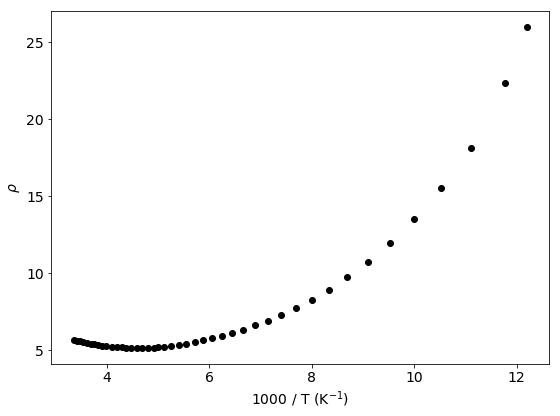

In [48]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
ax.plot(1000/T3, rho3, 'ko')
ax.set_xlabel('1000 / T (K$^{-1}$)', fontsize=14)
ax.set_ylabel(r'$\rho$', fontsize=14)
plt.tight_layout()

Mobility $\mu$

In [49]:
mu3 = np.abs(R_H3) / rho3

In [50]:
mu3

array([2.74303566, 2.7844485 , 2.80039829, 2.76193935, 2.73387519,
       2.77660391, 2.72662178, 2.69637537, 2.64553332, 2.64362467,
       2.62423362, 2.58431398, 2.56029913, 2.49863932, 2.41466546,
       2.40929706, 2.3700303 , 2.32259992, 2.2447514 , 2.23460574,
       2.1839927 , 2.13507484, 2.05795669, 1.99772258, 1.99154122,
       1.87612525, 1.76587617, 1.76749675, 1.76696202, 1.62312284,
       1.64164167, 1.63667877, 1.51334785, 1.50473563, 1.49221586,
       1.48603943, 1.51957648, 1.3513576 , 1.34236453, 1.32974085,
       1.20450637, 1.30373657, 1.18721042, 1.28864791])

In [51]:
R_H3

array([71.35711956, 62.28629928, 50.79659359, 42.93521601, 36.88800248,
       33.1387301 , 29.20804131, 26.24490669, 23.64460487, 21.89091295,
       20.31863743, 18.86730619, 17.71833562, 16.50889292, 15.29945021,
       14.73705935, 14.04767701, 13.39457795, 12.64472347, 12.32422116,
       11.8525385 , 11.42318634, 10.87288991, 10.45563218, 10.34678234,
        9.67554164,  9.07082028,  9.07082028,  9.07082028,  8.34515466,
        8.46609893,  8.46609893,  7.86137758,  7.86137758,  7.86137758,
        7.86137758,  8.10326612,  7.25665623,  7.25665623,  7.25665623,
        6.65193487,  7.25665623,  6.65193487,  7.25665623])

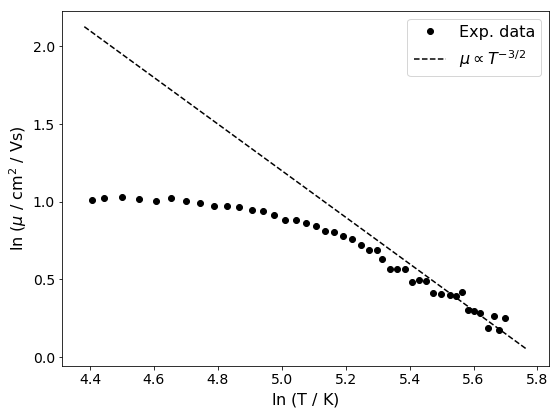

In [52]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
ax.plot(np.log(T3), np.log(mu3), 'ko', label='Exp. data')
t = np.linspace(80,320,10)
y = 8.7 + -3/2 * np.log(t)
ax.plot(np.log(t), y, 'k--', label=r'$\mu\propto T^{-3/2}$')
ax.set_xlabel(r'$\ln$ (T / K)', fontsize=16)
ax.set_ylabel(r'$\ln$ ($\mu$ / cm$^2$ / Vs)', fontsize=16)
#ax.set_yticks(np.arange(2,4,.15))
#ax.set_ybound(2.4,3.4)
#ax.set_xbound(4.35,5.75)
#ax.grid(linestyle='-')
ax.legend(loc=0, fontsize=16)
plt.tight_layout()
if save_figs:
    save_fig(fig, 'Hall_mobility')

Save data

In [53]:
data_final = pd.DataFrame(data={'Temperature':T3,
                                'Hall_Voltage':U_Hall3,
                                'R_mn_op':R_mn_op3,
                                'R_no_pm':R_no_pm3,
                                'Hall_coefficient':R_H3,
                                'carrier_density':p3,
                                'resistivity':rho3,
                                'mobility':mu3})
data_final.to_csv('final_dataset.csv')

In [54]:
U_Hall2

array([21.4 ,  7.4 ,  6.  ,  5.  ,  4.3 ,  3.9 ,  3.3 ,  3.  ,  2.9 ,
        2.6 ,  2.45,  2.3 ,  2.2 ,  2.1 ,  2.1 ,  2.  ,  1.92,  1.8 ,
        1.7 ,  1.7 ,  1.7 ,  1.6 ,  1.5 ,  1.5 ,  1.5 ,  1.38,  1.4 ,
        1.4 ,  1.3 ,  1.3 ,  1.3 ,  1.3 ,  1.34,  1.2 ,  1.2 ,  1.2 ,
        1.1 ,  1.2 ,  1.1 ,  1.2 ])